In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import datetime
import random

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_excel('t4.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14636 entries, 0 to 14635
Data columns (total 6 columns):
user_id            14636 non-null int64
type_device        14589 non-null object
revenue            14636 non-null float64
call_traffic       14636 non-null float64
web_traffic        14636 non-null float64
roaming_traffic    14636 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 686.2+ KB


В датасете 47 пустых строк в поле "type_device", пропущенную информацию нельзя восстановить. Удаляем эти строки.

In [4]:
df = df.dropna(axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14589 entries, 0 to 14635
Data columns (total 6 columns):
user_id            14589 non-null int64
type_device        14589 non-null object
revenue            14589 non-null float64
call_traffic       14589 non-null float64
web_traffic        14589 non-null float64
roaming_traffic    14589 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 797.8+ KB


Проверим на дубликаты. Исходя из характера данных в представленном датасете, дубликаты имеет смысл смотреть в поле "user_id".

In [6]:
df.duplicated(subset=['user_id']).value_counts()

False    14559
True        30
dtype: int64

30 строк дублируются в исследуемом поле. Необходимо удалить найденные дубли.

In [7]:
df = df.drop_duplicates(subset=['user_id'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14559 entries, 0 to 14635
Data columns (total 6 columns):
user_id            14559 non-null int64
type_device        14559 non-null object
revenue            14559 non-null float64
call_traffic       14559 non-null float64
web_traffic        14559 non-null float64
roaming_traffic    14559 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 796.2+ KB


Дубликаты удалены. Далее исследуем датасет на выбросы.

count    1.455900e+04
mean     1.005642e+05
std      1.246084e+07
min     -1.003596e+08
25%      3.137600e+02
50%      7.520002e+02
75%      1.746442e+03
max      1.500098e+09
Name: revenue, dtype: float64

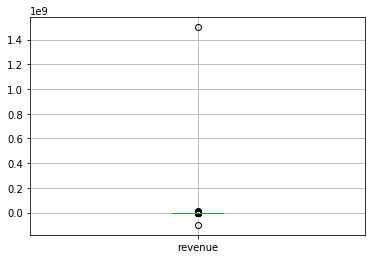

In [9]:
boxplot = df.boxplot(column='revenue') 
df['revenue'].describe()

В наборе данных, в поле "revenue", определенно присутствует выбросы - строки с аномальными значениями. Отрицательные значения примемь за переплату со стороны пользователей

Поле "revenue"

In [11]:
df['revenue'].min(), df['revenue'].max()

(-100359563.0, 1500098005.0)

In [12]:
df_1 = df[(df.revenue > -100359563) & (df.revenue < 1500098005)] 

In [13]:
df_1['revenue'].describe()

count    1.455700e+04
mean     4.422355e+03
std      1.282833e+05
min     -4.456467e+01
25%      3.137836e+02
50%      7.520002e+02
75%      1.746062e+03
max      1.538681e+07
Name: revenue, dtype: float64

Поле "call_traffic"

count    1.455700e+04
mean     1.577337e+03
std      6.927060e+04
min     -5.410000e+02
25%      3.861111e+00
50%      5.785278e+01
75%      9.667278e+02
max      8.335668e+06
Name: call_traffic, dtype: float64

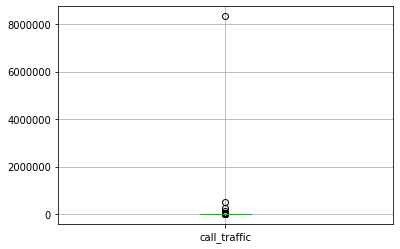

In [14]:
boxplot = df_1.boxplot(column='call_traffic') 
df_1['call_traffic'].describe()

In [15]:
df_1['call_traffic'].min(), df_1['call_traffic'].max()

(-541.0, 8335667.564)

In [16]:
df_2 = df_1[(df_1.call_traffic < 8335667)] 

In [17]:
df_2['call_traffic'].describe()

count     14556.000000
mean       1004.783214
std        5135.828236
min        -541.000000
25%           3.858333
50%          57.850000
75%         966.698612
max      493603.863900
Name: call_traffic, dtype: float64

Поле "web_traffic"

count    1.455600e+04
mean     2.362656e+04
std      4.830749e+04
min     -5.193738e+04
25%      5.313648e+02
50%      3.078614e+03
75%      4.520808e+04
max      1.772188e+06
Name: web_traffic, dtype: float64

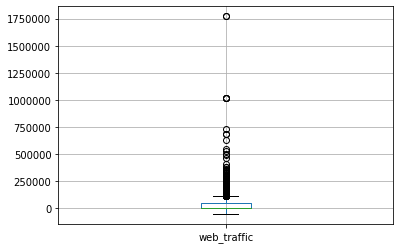

In [18]:
boxplot = df_2.boxplot(column='web_traffic') 
df_2['web_traffic'].describe()

In [19]:
df_2['web_traffic'].min(), df_2['web_traffic'].max()

(-51937.37989, 1772188.2)

Поле "roaming_traffic"

count    14556.000000
mean        91.694425
std        298.237142
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.480556
max       6782.911112
Name: roaming_traffic, dtype: float64

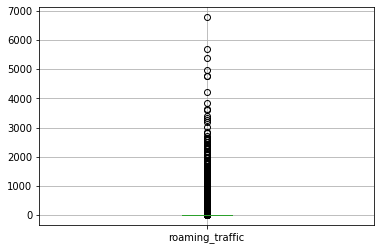

In [20]:
boxplot = df_2.boxplot(column='roaming_traffic') 
df_2['roaming_traffic'].describe()

In [21]:
df_2['roaming_traffic'].min(), df_2['roaming_traffic'].max()

(-1.0, 6782.911112)

In [22]:
df_2.to_excel('data.xlsx')